In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Covid_patients.xlsx')

In [3]:
data

,Date - Month,Date - Day,PatientZipCode,EDLengthofStayInHrs,PatientRace,PatientSex,ArrivalMethod,EdDisposition,DischargeDisposition,AcuityLevel,...,DM,CKD,ESRD,Cancer,HIV,Asthma,HTN,Transplant,LowIncome,obese
0,March,11,48025,10,Black,Male,Car,Admit,Expired,2 - Emergent,...,1,1,1,0,0,0,1,1,0,0
1,March,23,48023,13,White,Male,Other,Admit,Home or Self Care,2 - Emergent,...,0,0,0,0,0,0,0,0,0,1
2,March,23,48021,3,Black,Female,Car,Admit,Home or Self Care,2 - Emergent,...,0,0,0,0,0,0,0,0,1,1
3,March,24,48083,14,Do Not Know,Male,Rapid Response EMS,Admit,Expired,1 - Immediate,...,1,0,0,0,0,0,1,0,0,1
4,March,28,48071,18,Black,Male,Car,Admit,Home or Self Care,2 - Emergent,...,1,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,March,21,48342-3434,6,Black,Male,Other,Admit,Expired,2 - Emergent,...,1,0,0,0,0,0,1,0,1,1
532,April,3,48323-2797,19,White,Male,Rapid Response EMS,Admit,Home or Self Care,3 - Urgent,...,1,0,0,0,0,0,0,0,0,0
533,April,11,49201,15,White,Male,Detroit EMS,Admit,Skilled Nursing Facility,1 - Immediate,...,0,1,0,0,0,0,1,0,0,0
534,April,14,49230,1,White,Male,Detroit EMS,Discharge,Home or Self Care,2 - Emergent,...,0,0,0,0,0,0,0,0,0,1


In [4]:
extra = pd.read_csv('./Extra attributes.csv')

/Users/egbeetuetu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,4,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
extra = extra.dropna(how='all')

In [6]:
extra.loc[:, 'Date - Month'] = pd.to_datetime(extra.EDArrivalDate).dt.month_name()
extra.loc[:, 'Date - Day'] = pd.to_datetime(extra.EDArrivalDate).dt.day
extra.loc[:, 'PatientSex'] = extra.Sex
extra.loc[:, 'PrimaryChiefComplaint'] = extra.Chief_Complaint
extra.loc[:, 'ArrivalMethod'] = extra.Mode_of_Arrival

In [7]:
data.columns

Index(['Date - Month', 'Date - Day', 'PatientZipCode', 'EDLengthofStayInHrs',
       'PatientRace', 'PatientSex', 'ArrivalMethod', 'EdDisposition',
       'DischargeDisposition', 'AcuityLevel', 'PatientClass', 'Bed Assigned',
       'Age Group', 'PrimaryDiagnosisName', 'PrimaryChiefComplaint',
       'ArrivalDayofWeek', 'Anesthesiologist Assigned', 'ED Tech Assigned',
       'Fellow Assigned', 'Nursing Assistant', 'Physician',
       'Physician Assistant', 'Registered Nurse', 'Resident', 'Technician',
       'Hospitalist', 'Respiratory Therapist', 'insurance', 'ESI', 'Age',
       'Temp', 'BMI', 'Resp_failure', 'Sepsis', 'O2_Flow', 'MI', 'CAD', 'CHF',
       'PVD', 'Stroke', 'Dementia', 'COPD', 'Rheum', 'PepUlc', 'Liver', 'DM',
       'CKD', 'ESRD', 'Cancer', 'HIV', 'Asthma', 'HTN', 'Transplant',
       'LowIncome', 'obese'],
      dtype='object')

In [8]:
data = pd.merge(data, extra, on=['Date - Month', 'Date - Day', 'Temp', 'Age',
                                 'PatientSex', 'PatientClass', 
                                 'PrimaryChiefComplaint', 'ESI', 'ArrivalMethod'], how = 'left')

In [9]:
# data.to_csv('merged.csv')

## Print correlations for one-hot encoded categorical columns:

In [10]:
for c in data.columns:
    if str(data.dtypes.loc[c]) == 'object':
        one_h = pd.get_dummies(data.loc[:,c])
        print(c)
        display(pd.concat([data.EDLengthofStayInHrs, one_h], axis=1).corr().EDLengthofStayInHrs)
        print('============')

Date - Month


EDLengthofStayInHrs    1.000000
April                 -0.346014
March                  0.346014
Name: EDLengthofStayInHrs, dtype: float64

PatientZipCode


EDLengthofStayInHrs    1.000000
43611-2103            -0.036522
44109-3481            -0.044927
48021                 -0.110567
48023                  0.039125
                         ...   
48323-2797             0.089557
48342-3434            -0.019712
49201                  0.055936
49230                 -0.061738
77520                 -0.019712
Name: EDLengthofStayInHrs, Length: 104, dtype: float64

PatientRace


EDLengthofStayInHrs                 1.000000
American Indian/Alaska Native      -0.019712
Asian                              -0.048791
Black                               0.016014
Black/White                        -0.036522
Decline                             0.098172
Do Not Know                         0.012639
Hispanic                           -0.042862
Native Hawaiian/Pacific Islander   -0.053332
Oriental                           -0.051698
Other                              -0.012493
White                              -0.025281
Name: EDLengthofStayInHrs, dtype: float64

PatientSex


EDLengthofStayInHrs    1.000000
Female                 0.002476
Male                  -0.002476
Name: EDLengthofStayInHrs, dtype: float64

ArrivalMethod


EDLengthofStayInHrs     1.000000
*Unspecified           -0.011306
Car                    -0.054356
Community EMS          -0.044927
Detroit EMS            -0.004628
Hart EMS                0.074256
Lifeline/Concord EMS    0.009551
Med Star EMS            0.033619
Other                   0.016832
Other Ambulance         0.013814
Rapid Response EMS      0.020972
Superior EMS           -0.027317
Walk In                 0.013193
Wheelchair              0.102908
Name: EDLengthofStayInHrs, dtype: float64

EdDisposition


EDLengthofStayInHrs             1.000000
Admit                           0.244952
Discharge                      -0.357786
Expired                         0.013909
Place in Observation            0.030806
Transfer to Another Facility    0.156610
Name: EDLengthofStayInHrs, dtype: float64

DischargeDisposition


EDLengthofStayInHrs                                                                      1.000000
Another Health Care Facility                                                             0.027446
Discharged/transferred to a Designated Disaster Alternate Care Site                     -0.036522
Discharged/transferred to a federal health care facility with a planned acute care ho   -0.044927
Expired                                                                                  0.111993
Federal Hospital                                                                         0.043485
Home Health Care Service                                                                 0.023348
Home or Self Care                                                                       -0.162462
Hospice Home                                                                            -0.016004
IP Rehab Facility                                                                       -0.061738
LWCS - Before MD Eva

AcuityLevel


EDLengthofStayInHrs    1.000000
1 - Immediate          0.098276
2 - Emergent           0.042690
3 - Urgent            -0.110907
Name: EDLengthofStayInHrs, dtype: float64

PatientClass


EDLengthofStayInHrs    1.000000
Emergency             -0.272215
Inpatient              0.251004
Observation            0.014873
Outpatient             0.055383
Name: EDLengthofStayInHrs, dtype: float64

Bed Assigned


EDLengthofStayInHrs    1.000000
No                    -0.265609
Yes                    0.265609
Name: EDLengthofStayInHrs, dtype: float64

Age Group


EDLengthofStayInHrs    1.000000
10-19                 -0.045749
20-29                 -0.125258
30-39                 -0.035495
40-49                 -0.036090
50-59                 -0.017918
60-69                  0.024649
70-79                  0.088046
80-89                 -0.016534
90+                    0.064059
Name: EDLengthofStayInHrs, dtype: float64

PrimaryDiagnosisName


EDLengthofStayInHrs                   1.000000
COVID-19                              0.058515
Suspected COVID-19 virus infection   -0.058515
Name: EDLengthofStayInHrs, dtype: float64

PrimaryChiefComplaint


EDLengthofStayInHrs      1.000000
ABDOMINAL PAIN           0.048365
ABNORMAL LAB             0.004690
ALLERGIC REACTION        0.097962
ALTERED MENTAL STATUS   -0.000464
                           ...   
TACHYCARDIA             -0.044927
URI                     -0.036522
URINARY RETENTION        0.013909
WEAKNESS                -0.003245
WOUND                    0.089557
Name: EDLengthofStayInHrs, Length: 63, dtype: float64

ArrivalDayofWeek


EDLengthofStayInHrs    1.000000
Friday                -0.031113
Monday                -0.081602
Saturday               0.107987
Sunday                -0.043635
Thursday               0.005107
Tuesday                0.008388
Wednesday              0.039271
Name: EDLengthofStayInHrs, dtype: float64

Anesthesiologist Assigned


EDLengthofStayInHrs    1.000000
No                     0.010056
Yes                   -0.010056
Name: EDLengthofStayInHrs, dtype: float64

ED Tech Assigned


EDLengthofStayInHrs    1.000000
No                    -0.041126
Yes                    0.041126
Name: EDLengthofStayInHrs, dtype: float64

Fellow Assigned


EDLengthofStayInHrs    1.000000
No                    -0.016127
Yes                    0.016127
Name: EDLengthofStayInHrs, dtype: float64

Nursing Assistant


EDLengthofStayInHrs    1.0
No                     NaN
Name: EDLengthofStayInHrs, dtype: float64

Physician


EDLengthofStayInHrs    1.000000
No                     0.026677
Yes                   -0.026677
Name: EDLengthofStayInHrs, dtype: float64

Physician Assistant


EDLengthofStayInHrs    1.000000
No                    -0.028746
Yes                    0.028746
Name: EDLengthofStayInHrs, dtype: float64

Registered Nurse


EDLengthofStayInHrs    1.000000
No                     0.082954
Yes                   -0.082954
Name: EDLengthofStayInHrs, dtype: float64

Resident


EDLengthofStayInHrs    1.000000
No                     0.123225
Yes                   -0.123225
Name: EDLengthofStayInHrs, dtype: float64

Technician


EDLengthofStayInHrs    1.0
No                     NaN
Name: EDLengthofStayInHrs, dtype: float64

Hospitalist


EDLengthofStayInHrs    1.000000
No                     0.043929
Yes                   -0.043929
Name: EDLengthofStayInHrs, dtype: float64

Respiratory Therapist


EDLengthofStayInHrs    1.0
No                     NaN
Name: EDLengthofStayInHrs, dtype: float64

insurance_x


EDLengthofStayInHrs                1.000000
Commercial                        -0.069676
Medicaid                          -0.009558
Medicare                           0.092003
Worker's compensation insurance   -0.099253
Name: EDLengthofStayInHrs, dtype: float64

insurance_y


EDLengthofStayInHrs    1.000000
Commercial            -0.069551
Medicaid              -0.012204
Medicare               0.103005
Worker's c            -0.099253
Name: EDLengthofStayInHrs, dtype: float64

EDArrivalDate


EDLengthofStayInHrs    1.000000
3/11/20                0.013909
3/14/20               -0.002901
3/15/20               -0.011306
3/16/20               -0.044927
3/19/20                0.095328
3/20/20                0.013740
3/21/20               -0.043749
3/22/20                0.077617
3/23/20                0.100906
3/24/20                0.192392
3/25/20                0.043485
3/26/20                0.129593
3/27/20                0.140319
3/28/20                0.207742
3/29/20                0.031861
3/30/20                0.023732
3/31/20                0.100173
4/1/20                 0.179006
4/10/20               -0.109423
4/11/20               -0.055377
4/12/20               -0.090634
4/13/20               -0.098712
4/14/20               -0.098416
4/15/20               -0.087004
4/16/20               -0.059582
4/17/20               -0.122295
4/18/20               -0.099103
4/19/20               -0.048015
4/2/20                 0.015275
4/20/20               -0.081200
4/21/20 

Chief_Complaint


EDLengthofStayInHrs      1.000000
ABDOMINAL PAIN           0.048365
ABNORMAL LAB             0.004690
ALLERGIC REACTION        0.097962
ALTERED MENTAL STATUS    0.005927
                           ...   
TACHYCARDIA             -0.044927
URI                     -0.036522
URINARY RETENTION        0.013909
WEAKNESS                -0.003245
WOUND                    0.089557
Name: EDLengthofStayInHrs, Length: 62, dtype: float64

Sex


EDLengthofStayInHrs    1.000000
Female                 0.007380
Male                   0.002188
Name: EDLengthofStayInHrs, dtype: float64

Race


EDLengthofStayInHrs                 1.000000
American Indian/Alaska Native      -0.019712
Asian                              -0.048791
Black                               0.026457
Black/White                        -0.036522
Decline                             0.098172
Do Not Know                         0.010026
Hispanic                           -0.027825
Native Hawaiian/Pacific Islander   -0.053332
Oriental                           -0.051698
Other                              -0.018527
White                              -0.025281
Name: EDLengthofStayInHrs, dtype: float64

Mode_of_Arrival


EDLengthofStayInHrs     1.000000
Car                    -0.042478
Community EMS          -0.044927
Detroit EMS            -0.008972
Hart EMS                0.074256
Lifeline/Concord EMS    0.009551
Med Star EMS            0.033619
Other                   0.016832
Other Ambulance         0.015671
Rapid Response EMS      0.020972
Superior EMS           -0.027317
Walk In                 0.012804
Wheelchair              0.102908
Name: EDLengthofStayInHrs, dtype: float64

## Regression LR

In [11]:
X = data.loc[:, ['O2_Flow', 'Age', 'Resp_failure', 'ESI', 'CKD', 'HTN', 'DM', 'Stroke']]
X = pd.concat([X, pd.get_dummies(data.PatientClass).loc[:, ['Emergency', 'Inpatient']]], axis=1)
y = data.EDLengthofStayInHrs

In [12]:
lr = LinearRegression()
cv_results = cross_validate(lr, X, y, cv=3)

In [13]:
cv_results

{'fit_time': array([0.28624105, 0.00489378, 0.00443697]),
 'score_time': array([0.00314689, 0.00426292, 0.00223207]),
 'test_score': array([0.0312632 , 0.04627313, 0.08393971])}

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mean_squared_error(lr.predict(X_test), y_test)

23.129795382182326

In [16]:
r2_score(lr.predict(X_test), y_test)

-8.462171843752737

## Classification

Change bins here to try different binning:

In [17]:
def temp(x):
    if x > 100.4:
        return "High Temp"
    if x < 97:
        return "Low Temp"
    return "Avg temp"

In [18]:
data.Temp.apply(temp)

0       Avg temp
1      High Temp
2      High Temp
3       Avg temp
4       Avg temp
         ...    
531     Avg temp
532     Avg temp
533     Low Temp
534     Avg temp
535     Avg temp
Name: Temp, Length: 536, dtype: object

In [19]:
X = data.loc[:, ['O2_Flow','Resp_failure', 'ESI', 'CKD', 'HTN', 'DM', 'Stroke', 'SBP', 'HR', 'RR', 'Spo2']]
X = pd.concat([X, pd.get_dummies(data.PatientClass).loc[:, ['Emergency', 'Inpatient']]], axis=1)
X = pd.concat([X, pd.get_dummies(data.loc[:, 'Age Group'])], axis=1)
X = pd.concat([X, pd.get_dummies(data.Temp.apply(temp))], axis=1)
# bins = [-1,3,6,9,12,24,200] # 30% accuracy
# bins = [-1,6,12,200]      # 45% accuracy

# bins = [-1,3,6,12,200]
# bins = [-1,5,8,200]
bins = [-1, 4, 200]
y_bins = pd.cut(y, bins=bins).astype(str)

### Data distribution

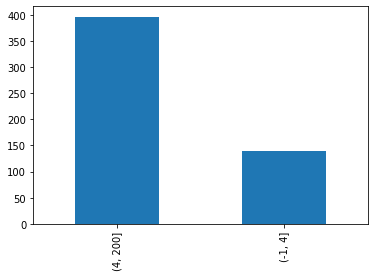

In [20]:
y_bins.value_counts().plot.bar()

In [21]:
X = pd.concat([X, pd.get_dummies(data.ArrivalMethod)], axis=1)

In [86]:
# oversample data:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y_bins)

### Gradient Boosting:

In [151]:
grad_boosting = GradientBoostingClassifier(learning_rate=0.001)
acc = cross_validate(grad_boosting, X_resampled.dropna(axis=1), y_resampled, cv=10)['test_score'].mean()
print('Accuracy:', acc)

Accuracy: 0.6166317260656883


In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X.dropna(axis=1), y_bins, test_size=0.33, stratify=y_bins)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
grad_boosting.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=0.001)

In [153]:
print(classification_report(grad_boosting.predict(X_test), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.85      0.34      0.48       116
    (4, 200]       0.41      0.89      0.56        61

    accuracy                           0.53       177
   macro avg       0.63      0.61      0.52       177
weighted avg       0.70      0.53      0.51       177



### Decision tree, oversampled:

In [154]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [155]:
columns = ['Community EMS', 'Emergency', 'Inpatient', 'O2_Flow']

In [156]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_resampled.loc[:, columns], y_resampled)
print(accuracy_score(tree.predict(X_test.loc[:, columns]), y_test))

0.6497175141242938


In [150]:
print(classification_report(tree.predict(X_test.loc[:, columns]), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.72      0.36      0.48        92
    (4, 200]       0.55      0.85      0.67        85

    accuracy                           0.59       177
   macro avg       0.63      0.60      0.57       177
weighted avg       0.64      0.59      0.57       177



[]

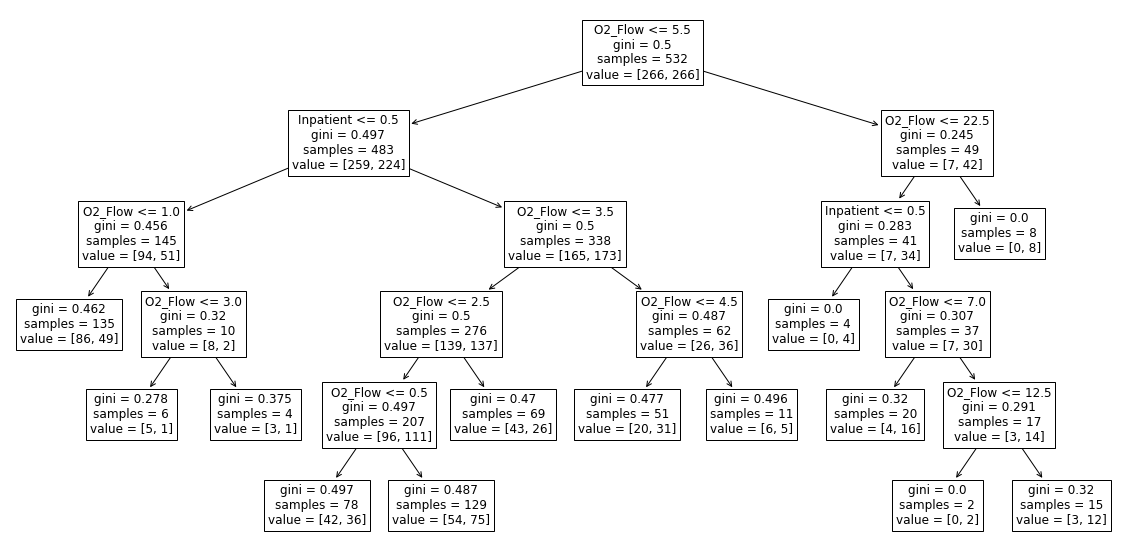

In [145]:
plt.figure(figsize=(20,10))
plot_tree(tree, fontsize=12, feature_names=columns)
plt.plot()

In [99]:
import numpy as np

In [100]:
preds = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bins, test_size=0.33, stratify=y_bins, random_state=42)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

for col in X_resampled.columns:
    tree = DecisionTreeClassifier(max_depth=1)
    mask = np.squeeze(~X_resampled.loc[:, [col]].isna().values)
    
    tree.fit(X_resampled.loc[mask, [col]], y_resampled.loc[mask])
    
    mask = np.squeeze(~X_test.loc[:, [col]].isna().values)
    preds.append([col, accuracy_score(tree.predict(X_test.loc[mask, [col]]), y_test.loc[mask])])

In [101]:
pd.DataFrame(preds, columns=['predictor', 'accuracy']).sort_values(by='accuracy', ascending=False)

,predictor,accuracy
11,Emergency,0.813559
12,Inpatient,0.796610
14,20-29,0.745763
13,10-19,0.740113
15,30-39,0.717514
32,Other,0.706215
7,SBP,0.678363
20,80-89,0.677966
4,HTN,0.661017
17,50-59,0.649718


In [102]:
cols = ['Emergency', 'Inpatient', '20-29', '10-19']
tree = DecisionTreeClassifier()
tree.fit(X_resampled.loc[:, cols], y_resampled)
print(classification_report(tree.predict(X_test.loc[:, cols]), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.59      0.60      0.59        45
    (4, 200]       0.86      0.86      0.86       132

    accuracy                           0.79       177
   macro avg       0.72      0.73      0.73       177
weighted avg       0.79      0.79      0.79       177



In [103]:
#tree = DecisionTreeClassifier(max_depth=5)
#tree.fit(X_resampled.dropna(axis=1), y_resampled)
#print(classification_report(tree.predict(X_test), y_test))

In [104]:
col = 'Emergency'
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_resampled.loc[:, [col]], y_resampled)
print(classification_report(tree.predict(X_test.loc[:, [col]]), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.59      0.66      0.62        41
    (4, 200]       0.89      0.86      0.88       136

    accuracy                           0.81       177
   macro avg       0.74      0.76      0.75       177
weighted avg       0.82      0.81      0.82       177



[]

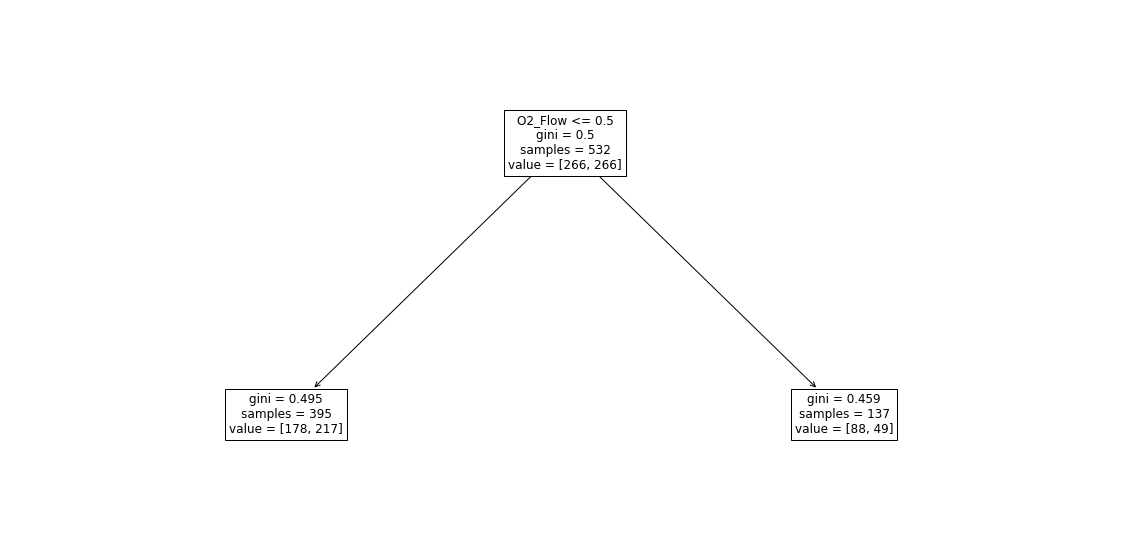

In [105]:
plt.figure(figsize=(20,10))
plot_tree(tree, fontsize=12, feature_names=X_train.columns)
plt.plot()

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
forest = RandomForestClassifier()
forest.fit(X_resampled.dropna(axis=1), y_resampled)
print(classification_report(forest.predict(X_test.dropna(axis=1)), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.41      0.51      0.46        37
    (4, 200]       0.86      0.81      0.83       140

    accuracy                           0.75       177
   macro avg       0.64      0.66      0.65       177
weighted avg       0.77      0.75      0.76       177



### Logistic Regression:

In [109]:
# penalty='elasticnet', l1_ratio=0.005, 
lr_multi = LogisticRegression(penalty='elasticnet', max_iter=1200, l1_ratio=0.005, solver='saga', class_weight='balanced')
acc = cross_validate(lr_multi, X.dropna(axis=1), y_bins, cv=5)['test_score'].mean()
print('Accuracy', acc)

Accuracy 0.6231914157147802


In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bins, test_size=0.33, stratify=y_bins, random_state=42)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train.loc[:, ['Emergency']], y_train)
lr_multi.fit(X_resampled, y_resampled)
print(classification_report(lr_multi.predict(X_test.loc[:,['Emergency']]), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.59      0.66      0.62        41
    (4, 200]       0.89      0.86      0.88       136

    accuracy                           0.81       177
   macro avg       0.74      0.76      0.75       177
weighted avg       0.82      0.81      0.82       177



In [111]:
confusion_matrix(lr_multi.predict(X_test.loc[:,['Emergency']]), y_test)

array([[ 27,  14],
       [ 19, 117]])

In [112]:
f_sc = f1_score(lr_multi.predict(X_test.loc[:,['Emergency']]) == '(-1, 4]', y_test == '(-1, 4]')
print('F1-score:', f_sc)

F1-score: 0.6206896551724138


In [113]:
print('ROC-AUC:', roc_auc_score(pd.get_dummies(y_test), lr_multi.predict_proba(X_test.loc[:,['Emergency']]), multi_class='ovo'))

ROC-AUC: 0.7400431463657484


In [114]:
confusion_matrix(lr_multi.predict(X_test.loc[:,['Emergency']]), y_test)

array([[ 27,  14],
       [ 19, 117]])

In [115]:
print(classification_report(lr_multi.predict(X_test.loc[:,['Emergency']]), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.59      0.66      0.62        41
    (4, 200]       0.89      0.86      0.88       136

    accuracy                           0.81       177
   macro avg       0.74      0.76      0.75       177
weighted avg       0.82      0.81      0.82       177



## SVM

In [118]:
from sklearn.svm import SVC

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X.dropna(axis=1), y_bins, test_size=0.33, stratify=y_bins, random_state=42)

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
svm = SVC()
svm.fit(X_resampled, y_resampled)
print(classification_report(svm.predict(X_test), y_test))

              precision    recall  f1-score   support

     (-1, 4]       0.76      0.34      0.47       103
    (4, 200]       0.48      0.85      0.61        74

    accuracy                           0.55       177
   macro avg       0.62      0.60      0.54       177
weighted avg       0.64      0.55      0.53       177



## Analyze coefficients of logistic regression (to be updated for new models)

In [133]:
coefs = pd.DataFrame([[n,c]for n, c in zip(X.columns, lr_multi.coef_[0])], columns=['name', 'coef'])
coefs.name[coefs.coef.argmax()]

'Emergency'

In [134]:
coefs.coef.sort_values()

4    -0.547092
7    -0.293011
22   -0.136971
0    -0.125691
6    -0.111561
9    -0.104872
16   -0.084761
21   -0.051215
3    -0.029166
10   -0.026375
14   -0.026114
15   -0.014936
1    -0.014465
20    0.007940
17    0.027772
11    0.070871
19    0.072204
12    0.131002
5     0.193715
18    0.230141
13    0.439982
2     0.440476
8     0.831302
Name: coef, dtype: float64

In [137]:
coefs.name[[4,7]]

4       CKD
7    Stroke
Name: name, dtype: object